In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uncertainty_toolbox as uct
import uncertainty_toolbox.metrics as umetrics
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists_vectorized,
)
import uncertainty_toolbox.viz as uviz
from uncertainty_toolbox.recalibration import iso_recal

from dataset import get_dataset
from metrics import Metrics

In [3]:
_, _, data_np = get_dataset(name="electricity", window_len=1, cxt_len=1, pred_len=1)

In [5]:
pred_len = 100
window_len = 400
sample_len = 800

# only train with the first few observations of each time series
train_ds = data_np[:, :sample_len-pred_len]
test_ds = data_np[:, sample_len-pred_len:sample_len]

In [10]:
train_mean = []
train_sd = []
for i in range(train_ds.shape[0]):
    sample_mean = np.mean(train_ds[i])
    sample_sd = np.std(train_ds[i], ddof = 1)
    train_mean.append(sample_mean)
    train_sd.append(sample_sd)
    train_ds[i] = (train_ds[i] - sample_mean) / sample_sd
    test_ds[i] = (test_ds[i] - sample_mean) / sample_sd

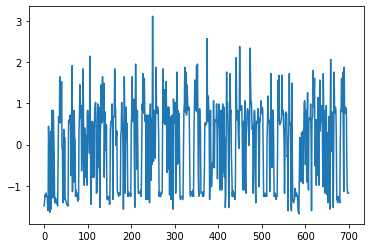

In [14]:
plt.plot(train_ds[0])

In [15]:
with open('test_pred.npy', 'rb') as f:
    pred_mean = np.load(f)
    pred_var = np.load(f)
pred_sd = np.sqrt(pred_var)

In [20]:
print(uct.metrics.get_all_metrics(pred_mean.reshape(-1), pred_sd.reshape(-1), test_ds.reshape(-1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 10%|████▎                                      | 1/10 [00:00<00:01,  7.38it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 10%|████▎                                      | 1/10 [00:00<00:01,  7.21it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:06<00:00,  1.64it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.227
  RMSE          0.334
  MDAE          0.154
  MARPD         43.025
  R2            0.892
  Correlation   0.945
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.040
  Mean-absolute Calibration Error       0.034
  Miscalibration Area                   0.034
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.043
     Group Size: 0.56 -- Calibration Error: 0.036
     Group Size: 1.00 -- Calibration Error: 0.034
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.046
     Group Size: 0.56 -- Calibration Error: 0.042
     Group Size: 1.00 -- Calibration Error: 0.040
===============

Lims is None. Setting lims now:
min_max_true: (-2.8923478, 4.8128605)
min_max_pred: (-2.3901989459991455, 3.726839542388916)
lims: (-2.892347812652588, 4.812860488891602)
lims_ext: (-3.6628686428070067, 5.583381319046021)


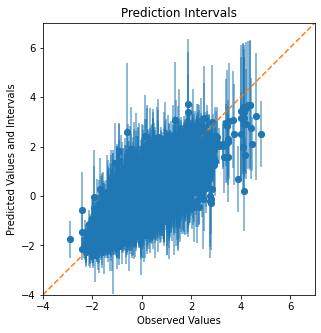

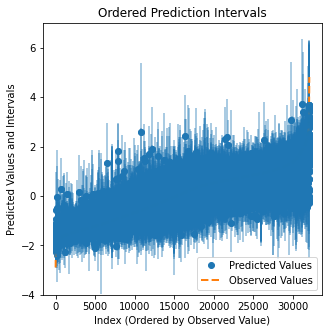

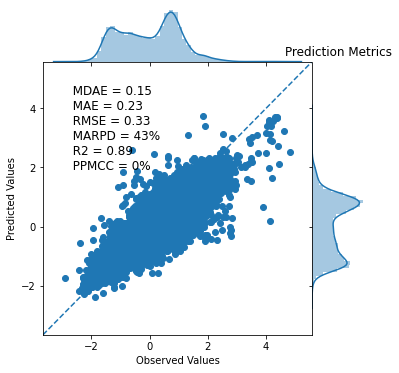

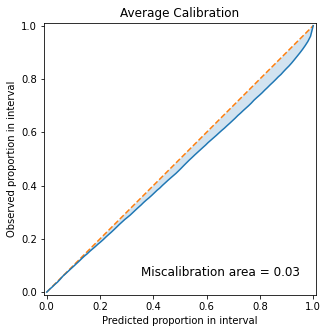

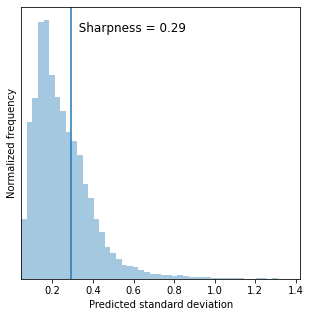

In [21]:
uviz.plot_intervals(pred_mean.reshape(-1), pred_sd.reshape(-1), test_ds.reshape(-1))
uviz.plot_intervals_ordered(pred_mean.reshape(-1), pred_sd.reshape(-1), test_ds.reshape(-1))
uviz.plot_parity(pred_mean.reshape(-1), test_ds.reshape(-1))
uviz.plot_calibration(pred_mean.reshape(-1), pred_sd.reshape(-1), test_ds.reshape(-1))
uviz.plot_sharpness(pred_sd.reshape(-1))

In [22]:
with open('test_pred_kernel.npy', 'rb') as f:
    pred_mean = np.load(f)
    pred_var = np.load(f)
pred_sd = np.sqrt(pred_var)

In [23]:
print(uct.metrics.get_all_metrics(pred_mean.reshape(-1), pred_sd.reshape(-1), test_ds.reshape(-1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 10%|████▎                                      | 1/10 [00:00<00:01,  7.60it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 10%|████▎                                      | 1/10 [00:00<00:01,  7.54it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:06<00:00,  1.64it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.232
  RMSE          0.339
  MDAE          0.155
  MARPD         43.724
  R2            0.888
  Correlation   0.945
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.034
  Mean-absolute Calibration Error       0.030
  Miscalibration Area                   0.030
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.038
     Group Size: 0.56 -- Calibration Error: 0.032
     Group Size: 1.00 -- Calibration Error: 0.030
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.041
     Group Size: 0.56 -- Calibration Error: 0.036
     Group Size: 1.00 -- Calibration Error: 0.034
===============

Lims is None. Setting lims now:
min_max_true: (-2.8923478, 4.8128605)
min_max_pred: (-2.2258667945861816, 3.1153435707092285)
lims: (-2.892347812652588, 4.812860488891602)
lims_ext: (-3.6628686428070067, 5.583381319046021)


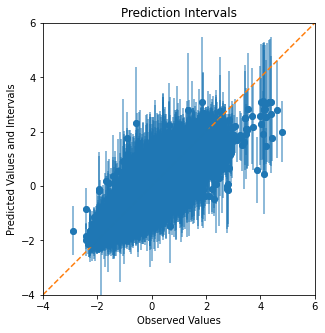

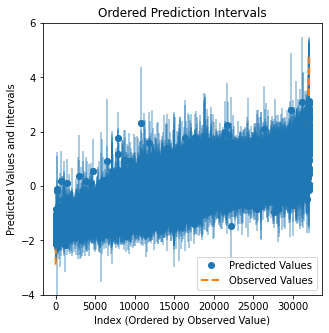

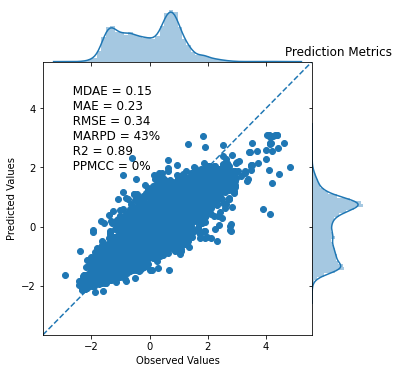

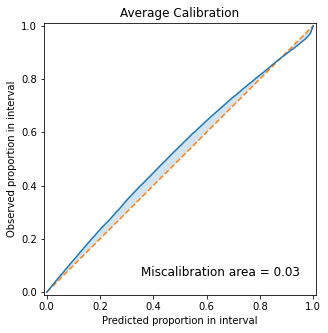

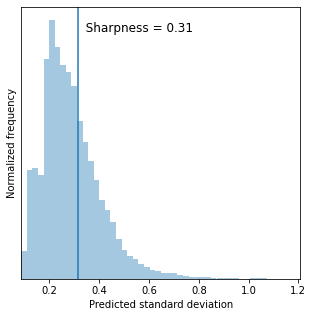

In [24]:
uviz.plot_intervals(pred_mean.reshape(-1), pred_sd.reshape(-1), test_ds.reshape(-1))
uviz.plot_intervals_ordered(pred_mean.reshape(-1), pred_sd.reshape(-1), test_ds.reshape(-1))
uviz.plot_parity(pred_mean.reshape(-1), test_ds.reshape(-1))
uviz.plot_calibration(pred_mean.reshape(-1), pred_sd.reshape(-1), test_ds.reshape(-1))
uviz.plot_sharpness(pred_sd.reshape(-1))